### A Data Driven Evaluation of Bank Telemarketing Strategies
***Using Machine Learning to build the best possible campaign approach***

> Name: Rajarshi Bhattacharjee <br>
> Roll No: 20349 <br>
> Department: Economic Sciences <br>
> Course: Data Science in Practice, August - December 2022 <br>

### Motivation
Coming from a research institute, it is expected from a student in economics to choose a topic that deals with some major social issue or try building some groundbreaking model that could trigger another dot.com burst. But my interest in consumer behaviour, business psychology and strategy developement drove me to choose this topic which falls in the interestion of all three. Also, a major motivation to choose this project stems from the thought of using the methods and strategies I learn through this to build a full fledged AI that can build end to end marketing models for any marketing firm. 

### Abstract <br>
Direct marketing allows banks and other financial institutions to identify clients who are likely to be receptive to their products, offers, and other packages. Identifying this category of clients is complex for financial organisations. In line with the aforementioned, this study considered the typical case of bank direct marketing campaign dataset with two main objectives:
1. To use visualizations on the available data and extract valuable trends and customer behaviour to construct the best possible strategy.
2. To use data mining process employing ranking & classification (LightGBM) and clustering (SHAP) methods to predict if the client will subscribe a term deposit. 

In accordance with the conclusions of the cluster analysis, clients having longer call durations are more inclined to sign up to the term deposit. Furthermore, the results indicated that clients with a minimum of a secondary school background are good prospects for bank term deposit subscriptions. More such insights have been drawn throughout the course of this project and the same have been highlighted accoridingly.
 
**Research Question** : What are the factors that affect a bank's marketing campaign success? Which characteristics of a consumer influence their decisions the most? Do other factors affect their decisions? 

### Background
The analysis of an organization's marketing data is one of the most typical applications of data science. The goal of marketing campaigns is to educate as well as provide value to a target audience so that they'd consider buying the organization's products and gain income as a result. There are two primary methods that firms market their products and services: mass campaigns, which concentrate over the whole populace, and direct campaigns, which only target a specific category of people. Exisiting research shows  that the effectiveness of a large-scale campaign is quite low.

A direct approach focuses just on a small set of people who are deemed to be more likely to be interested in the product being marketed and hence would be significantly more productive to engage. The selection of these prospective consumers presents a significant classification issue in Data Mining, which arises from matching client variables (e.g. age, marital status, educational level, etc.) and other characteristics (e.g. loan request/repayment, etc.) to various outputs (e.g. whether or not a customer will subscribe to a term deposit). 
As a result, the goal of this project is to tackle the problem by developing models and conducting analysis to make the target selection process more efficient.

The analysis of data from a marketing campaign can be used to:

1. Enhance the campaign effectiveness by determining the key features that influence a term deposit to be subscribed by customers.

2. Identify and segment the clientele in different profiles. Helping in the choice of target audience for future campaigns.

**What is a Term Bank Deposit?** <br>
A term bank deposit is an agreement in which the depositor agrees to leave an amount of money deposited with a financial institution for a certain period of time, and the financial institution in turn agrees to return the amount plus interest to the depositor at the end of the period.

#### About the Dataset
In this study, [Bank Marketing Data Set data provided by the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing) is used. This data refers to a marketing campaign of a Portuguese banking institution, where customers were contacted via telephone call, to be offered term deposit contracts.

Each entry in this database refers to a customer who has been contacted by the marketing campaign, and includes information about the customer's personal characteristics, information related to the campaign and the customer's final response to accepting or refusing the product offer (term deposit contract).

**Dataset Size** : 11 Columns 11.2k Rows

The general objective of this study is to apply data science techniques to analyze the information from a database of a marketing campaign of a financial institution and extract insights that can guide your future marketing strategies. The most specific objective of this study will be to use machine learning techniques to build a model to predict the chance of success of the marketing campaign, and identify which factors most affect this chance.

### Setup

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px 

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

In [2]:
df = pd.read_csv('/Users/rajarshibhattacharjee/Desktop/Academic/Assignments/Final Project/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##### Dataset information:

Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: bank balance 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')

Info related with the last contact of the current campaign:
1. contact: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
4. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;-1 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
1. deposit - has the client subscribed a term deposit? (binary: 'yes','no')

### Descriptive Analysis , Data Cleaning and Feature Engineering

In [3]:
df.describe().style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
df.isnull().values.any()

False

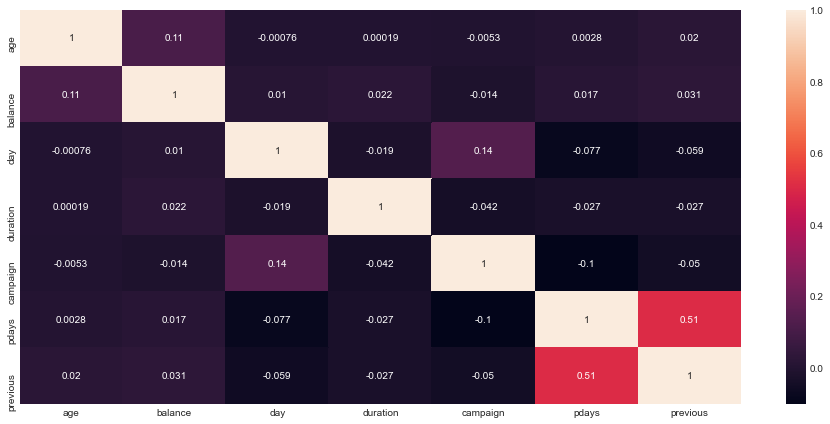

In [7]:
#Find correlation
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Insights** <br>
Here, almost all correlations are insignificant except for pdays-previous.

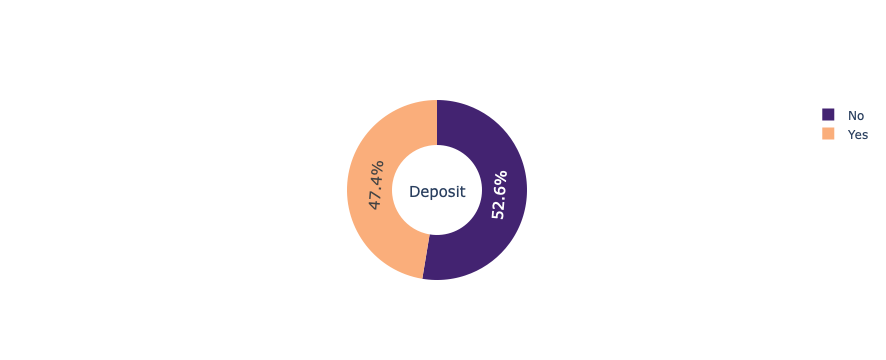

In [9]:
# Data Balance Check
labels = ['No','Yes']
values = df['deposit'].value_counts()
colors = ['#432371', '#FAAE7B']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_traces(hoverinfo='label+value',textfont_size=15,marker=dict(colors=colors))
fig.update_layout(annotations=[dict(text='Deposit', font_size=15, showarrow=False)])
fig.show()

**Insights** <br>
This data balance check shows that the yes:no ratio is almost 50:50, which is a good indiction of balanced output.

<Figure size 1440x360 with 0 Axes>

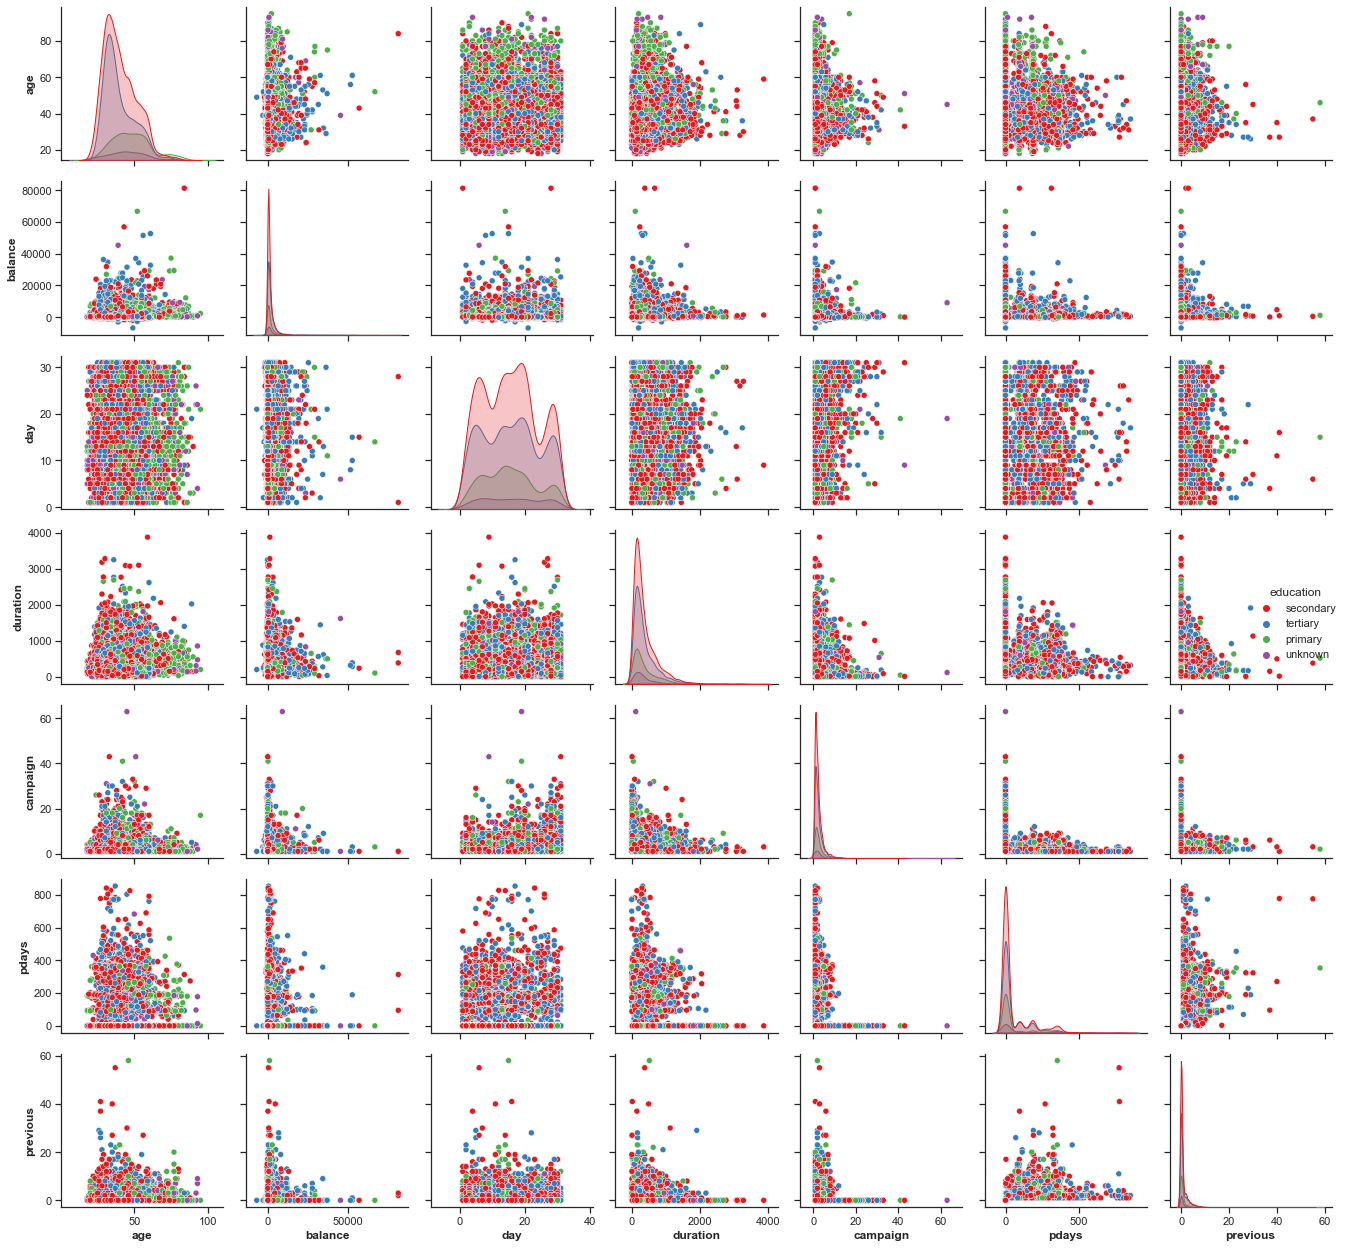

In [8]:
plt.figure(figsize=(20,5))
sns.set(style="ticks")
sns.pairplot(df, hue="education", palette="Set1")
plt.show()

**Insights** <br>
We can't detect a significant correlation between the features

In [10]:
df_2 = df.select_dtypes(include='object').columns.drop(["deposit","job"])
df_2

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

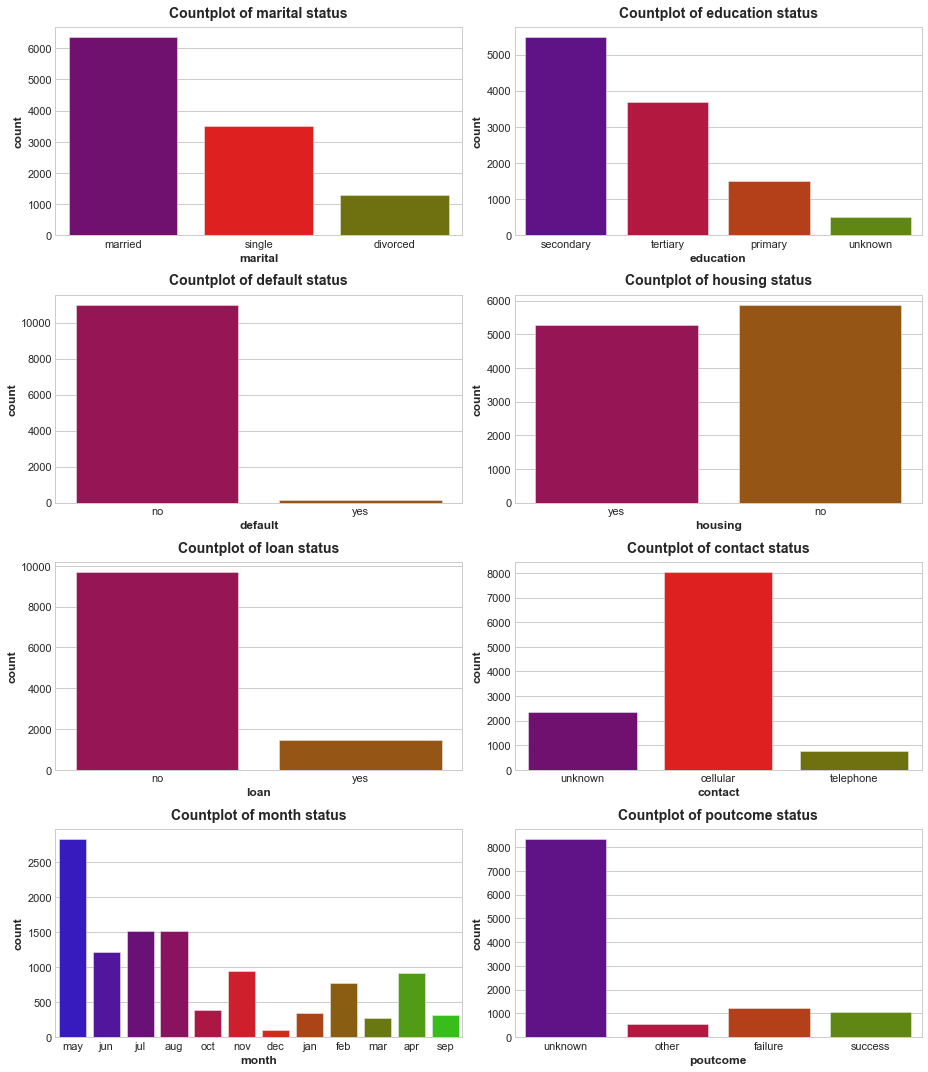

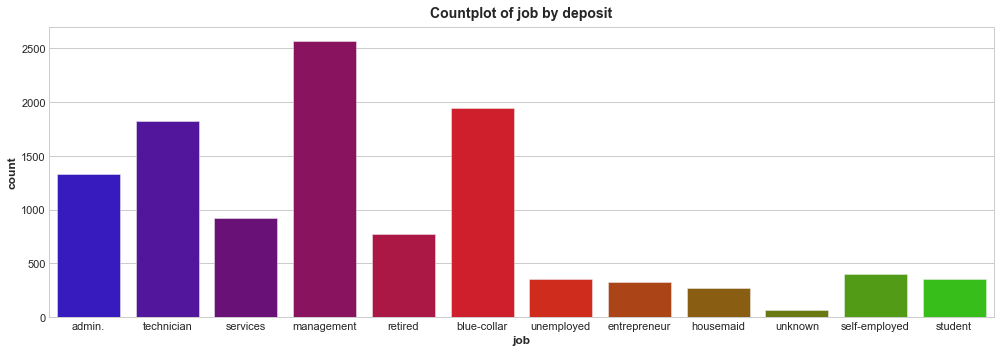

In [38]:
#Find data distribution category-wise

plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_2):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,palette=('brg') ,data=df)
    plt.title("Countplot of {} status".format(cat_fea))
plt.tight_layout()    
plt.show()

plt.figure(figsize=[14,5])
sns.countplot(x='job', palette=('brg') ,data=df)
plt.title("Countplot of job by deposit")
plt.show()

**Insights** <br>
These plots give many valuable insights about the dataset distribution:
1. Most clients are either management, techinician or blue-collared
2. Most of the calls were made in May
3. The majority of the population dont have any personal loans and have no defaults.
4. The housing loan situation is sort of balanced, a large chunk of the populance have housing loan
5. Married clients are the majority.

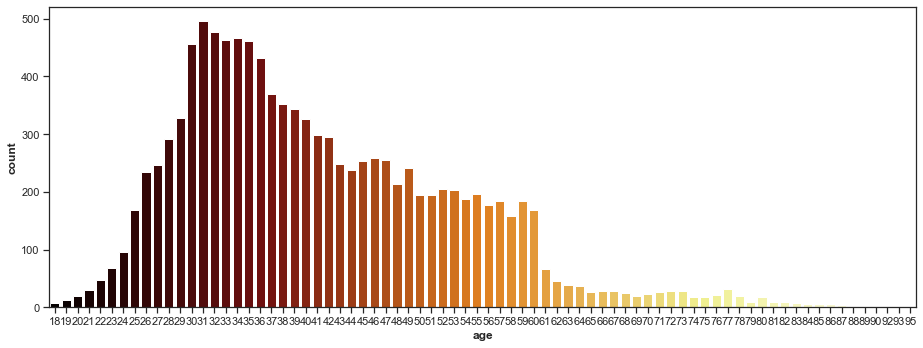

In [12]:
#Age Distribution
plt.figure(figsize=(13,5))
sns.countplot(df['age'], palette=("afmhot"))
plt.show()

**Insights** <br>
Here, the age distribution chart is heavily left skewed, showing that majority of the customers fall in the age bracket of 25-50 with the bars peaking at 30-32. <br>
This is a good marketing strategy used by the banks as the working population in this age bracket is the most ambitious crowd and are the most likely to consider the products.

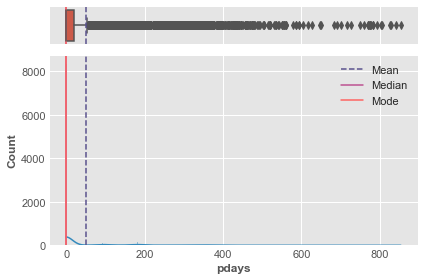

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['pdays'].mean()
median=df['pdays'].median()
mode=df['pdays'].mode().values[0]

sns.boxplot(data=df, x="pdays", ax=ax_box)
ax_box.axvline(mean, color='#58508d', linestyle='--')
ax_box.axvline(median, color='#bc5090', linestyle='-')
ax_box.axvline(mode, color='#ff6361', linestyle='-')

sns.histplot(data=df, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='#58508d', linestyle='--', label="Mean")
ax_hist.axvline(median, color='#bc5090', linestyle='-', label="Median")
ax_hist.axvline(mode, color='#ff6361', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

**Insights** <br>
This plot signifies the largest share of customers were never contacted (-1). <br>
Hence we can make a dummy variable for new customers to ease the process

In [15]:
df['new_cust'] = df['pdays'] == -1
df['new_cust'] = df['new_cust'].map({False:0, True:1})
df[['new_cust', 'pdays']].tail()

,new_cust,pdays
11157,1,-1
11158,1,-1
11159,1,-1
11160,0,172
11161,1,-1


### Exploratory Data Analysis

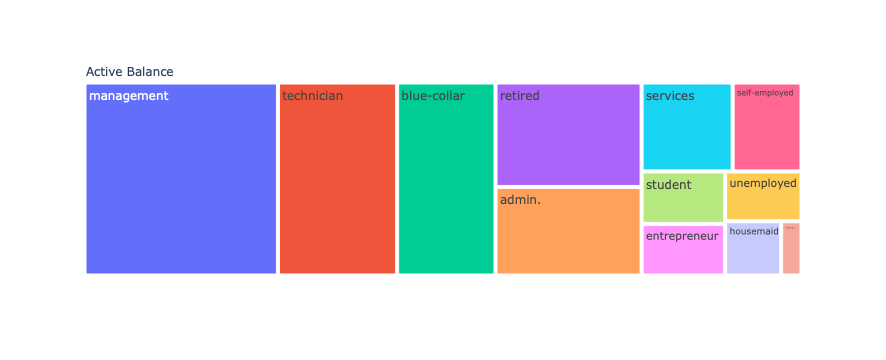

In [35]:
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

**Insights** <br>
Here, we can see that the clients in management have the highest active bank balance `followed by techinicians and blue-collared people. Hence focussing on these categories seems to be a better option as they will have more amount to use.

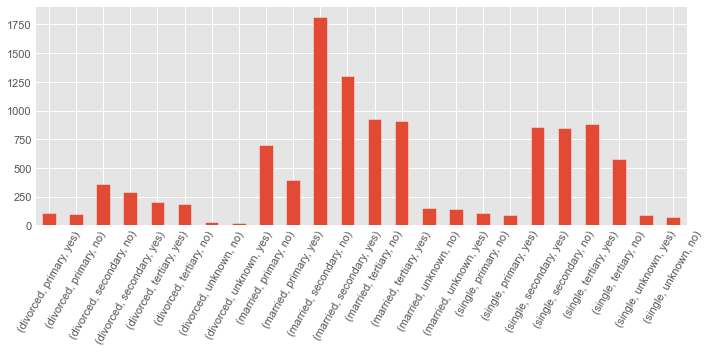

In [13]:
#Marital Status, Education level on Deposit status
style.use('seaborn-darkgrid') 
style.use('ggplot')
df.groupby(['marital','education'])['deposit'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xticks(rotation='60')
plt.xlabel(None)
plt.show()

**Insights** <br>
This plot shows that married clients with primary education have agreed to the deposits most followed by married clients with secondary education.

In [40]:
#Palette for Aesthetics
palette = {'yes':'#bc5090', 'no':'#f95d6a'}
# palette = ('PiYG')

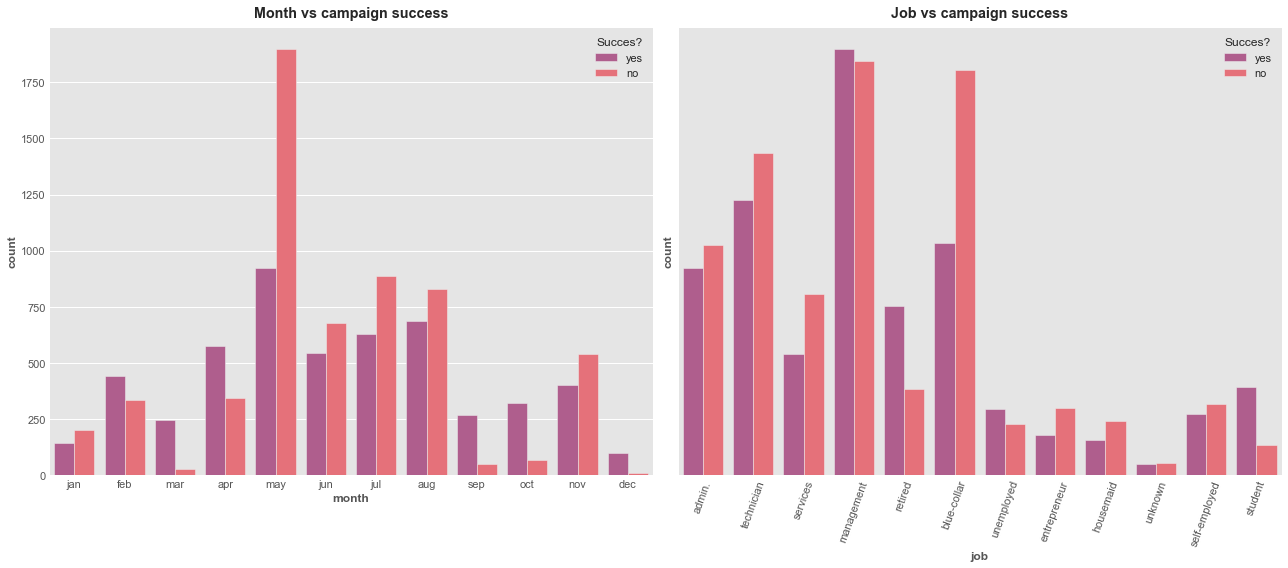

In [17]:
#Deeper EDA to find what affects campaign success
plt.figure(figsize=(18, 8));

plt.subplot(1, 2, 1)
plt.title('Month vs campaign success')
g = sns.countplot(x= 'month', hue = 'deposit', data=df, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], palette=palette);
plt.legend(title='Succes?', ncol=1, shadow=True)
# plt.yticks([])

plt.subplot(1, 2, 2)
# plt.figure(figsize=(8, 5.5));
plt.title('Job vs campaign success')
g = sns.countplot(x= 'job', hue = 'deposit', data=df, palette=palette)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)

plt.show()

**Insights** <br>
1. It looks like that customers tends to accept more the deposit on March, April, September and October. May seems to be the worst time to carry out campaigns as the maximum number of rejections seem to come in May. That is in line with our other observations as well because the maximum number of clients have also been called in May. 
2. We can see that customers with job type as 'student' or 'retired' tends to accept the deposit, while 'blue collars' largely refused the deposit. This is in contrast with the previous plot on job type, where it looked like white collared people with a lot of bank balance would agree to the deposits.

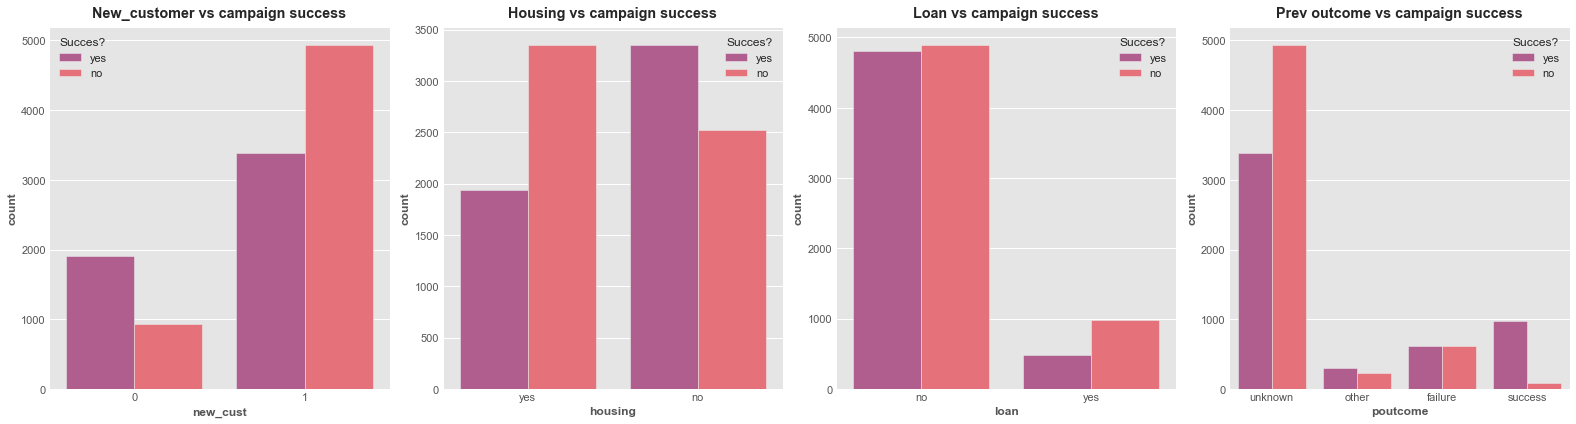

In [18]:
#Deeper EDA to find what affects campaign success: New customer, Housing Loan, Other LOan, Prev Outcome
plt.figure(figsize=(22,6));

plt.subplot(1, 4, 1)
plt.title('New_customer vs campaign success')
sns.countplot(x= 'new_cust', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)
# plt.yticks([])

plt.subplot(1, 4, 2)
plt.title('Housing vs campaign success')
sns.countplot(x= 'housing', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)

plt.subplot(1, 4, 3)
plt.title('Loan vs campaign success')
sns.countplot(x= 'loan', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)

plt.subplot(1, 4, 4)
plt.title('Prev outcome vs campaign success')
sns.countplot(x= 'poutcome', hue = 'deposit', data=df, palette=palette);
plt.legend(title='Succes?', ncol=1, fancybox=True, shadow=True)

plt.show()

**Insights** <br>
1. We can see that customers who previously accepted the deposit tends to accept the deposit by a large margin. Due to a growth in trust.
2. We can see that customers who had previously been contacted tends to accept the deposit. Maybe due to familiarity.
3. Customers without a Housing Loan tends to accept the deposit. Due to lesser financial constraints.
4. It looks like that customers with a personal loan tends to refuse the deposit. This makes sense as these customers have more financial constraints compared to the rest

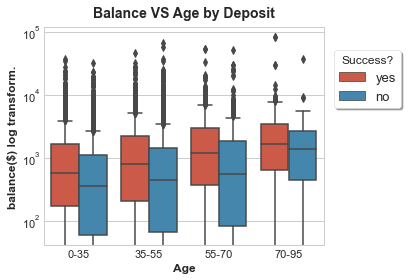

In [39]:
df['age_cate'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '35-55', '55-70', '70-95'])

plt.figure(figsize=(6,4))
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df)
plt.ylabel('balance($) log transform.')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 0.6), title='Success?', loc = 'lower right', fontsize=13, shadow=True, frameon=True)

plt.show()

**Insights** <br>

From this plot we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

### Data Preparation for ML algorithms

A Classification model is employed in the following steps to predict deposit terms. Following that, a clustering process will study which features were taken into consideration by the model and also study which feature values lead to success in the campaign and which dont. 

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
 
df_4 = df.copy()

for col in df_4:
    if df_4[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_4[col].unique())) <= 2:
        
            le.fit(df_4[col])
            df_4[col] = le.transform(df_4[col])
            
           
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.
3 columns were label encoded.
4 columns were label encoded.


In [21]:
df_5=pd.get_dummies(df_4)

In [22]:
df_5.head(2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_cate_0-35,age_cate_35-55,age_cate_55-70,age_cate_70-95
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,0,0,1,0,0,1,0
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
X=df_5.drop(columns='deposit',axis=1)
y=df_5.deposit

Here, we bring deposit to the regressand side and the rest of the features to the regressor end.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

#### Light GBM 
LightGBM, short for light gradient-boosting machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks.
It is preferrd over other classifiers like XGBoost due to its speed and scalability. <br>
In this context, this model is chosen to build a model that can predict if a customer will accept a term deposit or not based on the different inputs available. This will be the primary focus of this project. 

In [25]:
import lightgbm as lgb
from sklearn.feature_selection import RFE
model = lgb.LGBMClassifier(learning_rate= 0.01,n_estimators=1000)
model.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000)

In [26]:
y_pred= model.predict(X_test)

[[972 199]
 [112 950]]
0.8607254814151366


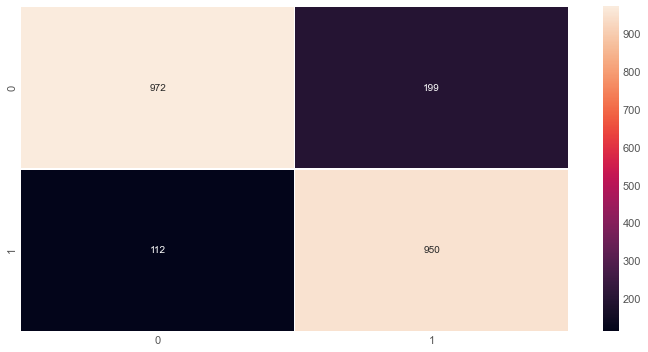

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

In [28]:
#Check Overfitting

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9097
Test set score: 0.8607


So, we can see that the model gets a fit of 86%. Improvements can be done in the accuracy by adding more variables and features in the dataset. Other models can be employed to check for the best possible accuracy. 

### Shap (SHAPley Additive exPlanations)

The model trained well, and we got 0.86 scores on the test set, which is not bad. Here the main question is which features are significant and how much each component affects the model, and how? Sklearn feature importance and permutation importance can give us the value for the feature importance.

This time, I'll use the shap library to analyze the model result. For a given prediction, SHAP values can tell us how much each factor in a model has contributed to the forecast. We can also aggregate SHAP values to understand how the model generally makes predictions. Ultimately, we can use SHAP values to identify and visualize important relationships in our model. In doing so, we gain an understanding of how our model works.

 99%|===================| 2218/2233 [01:36<00:00]        

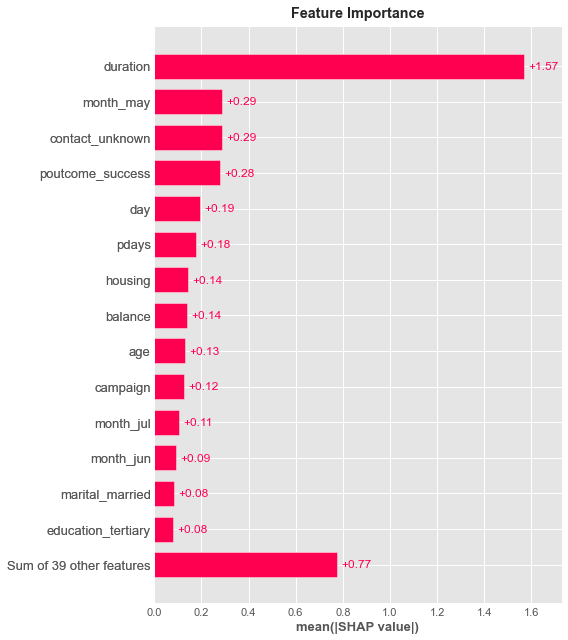

In [29]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
plt.title('Feature Importance')
shap.plots.bar(shap_values,max_display=15)

Passing a matrix of SHAP values to the bar plot function creates a global feature importance plot, where the international importance of each feature is taken to be the mean absolute value for that feature over all the given samples. It can be seen that duration hold the highest feature importance among all the other features. <br>

The beeswarm plot is about to display an information-dense summary of how the top features in a dataset impact the model’s output. So, beeswarm can help us to dive deeper and can give ideas for consideration. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high duration increases the predicted deposit prediction.

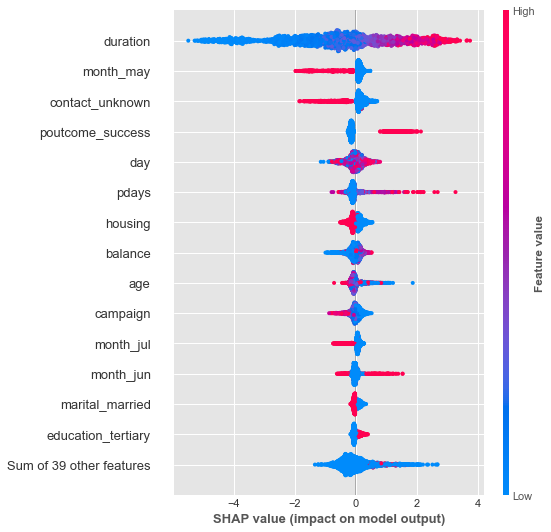

In [30]:
shap.plots.beeswarm(shap_values, max_display=15)

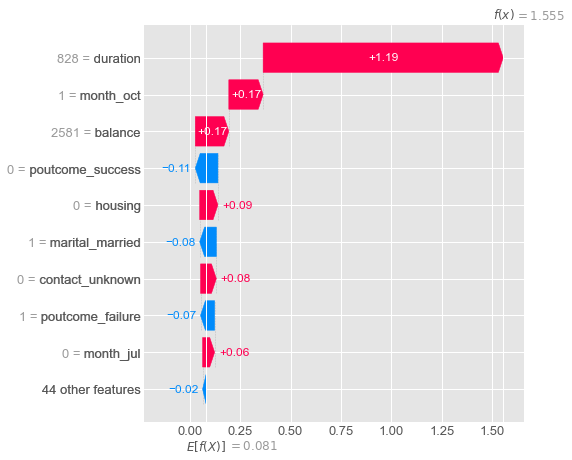

In [31]:
shap.plots.waterfall(shap_values[0],max_display=10)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.
**Insights** <br>
1. Duration time directly affects the customer's decision.
2. In May, the effectiveness of the campaign decreased. When we are looking at the beeswarm graph, more month_may value reduced shap values which affect get a failure on it
3. Focusing on previous success campaign, customers return as a positive result.
4. The campaign should focus on the customers who had an appropriate balance amount rather than concentrate on everyone

100%|===================| 2227/2233 [01:37<00:00]        

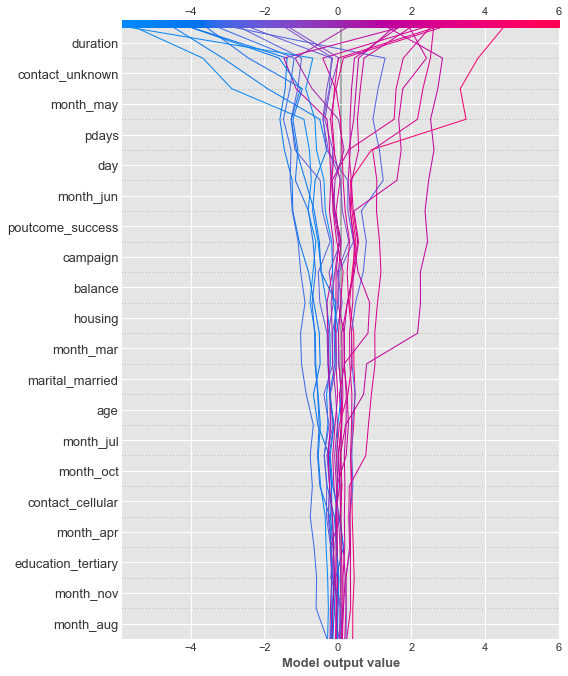

In [32]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

shap.decision_plot(expected_value, shap_array[0:25],feature_names=list(X_test.columns))

We can see 25 lines in the plot —one for each abalone—the end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. As you increase the number of observations, it will become too cluttered, and it will not be easy to understand how the model works. Hence, even observing 25 observations is difficult to observe here. 

### Overall Insights and Conclusion
**When is a good time?** <br>
We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

**Loyalty** <br>
As we see on the second graph, the campaign was successful with the loyal customer(poutcome_success). Obviously, working with loyal customers is always cheaper and more advantageous. We should be considering advertising to increase brand awareness. 

**Duration** <br>
Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. Getting the customer's attention and giving detailed and simplified information about the product can mean more awareness for the product so that it will be returned as positive results.

**House Loans and Balances** <br>
Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. 
This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account.The next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of subscribing to a term deposit.

**Occupation** <br>
Potential clients that were students or retired were the most likely to subscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. 


#### Some Extra Creative Marketing Strategies
1. Location-Based Advertising
2. Gamification in FinTech
3. Make Customer Service Fun!
4. Highlight Success Stories
5. Social Media Personality
6. Partnerships
7. Reward Users for Engagement

### Acknowledgement
I would like to thank Dr Parthiban for providing me with this opportunity to work on this project which not only introduced me to the intersection of business and Data science, but also helped me learn so much about the different methods of using data science to improve business. 

### References
The websites I used as motivation and reference for this project are:
1. https://github.com/slundberg/shap
2. https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
3. https://ieeexplore.ieee.org/abstract/document/9649623
4. https://en.wikipedia.org/wiki/LightGBM
5. https://ieeexplore.ieee.org/abstract/document/8215961/
6. https://www.kaggle.com/code/sasakitetsuya/modeling-by-cb-and-ann-who-should-we-focus-on
7. https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit



## Thank You